
# E-Commerce – EDA – Python Project 2 


# Context of Data

Company - UK-based and registered non-store online retail

Products for selling - Mainly all-occasion gifts

Customers - Most are wholesalers (local or international)
     
Transactions Period - 1st Dec 2010 - 9th Dec 2011


# Solutions for problem statments

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [3]:
# specify encoding to deal with different formatsPython Assigenment_1
df = pd.read_csv('C:/Users/salma/OneDrive/Documents/Desktop/Python Assigenment_1/Python Assignment_2/Ecommerce - UK Retailer.csv', encoding = 'ISO-8859-1')

## 1. Perform Basic EDA

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

Column name changed for ease of accessing

In [6]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [8]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

In [9]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


### Data Cleaning 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


#cust_id has some missing values

## 2. Check for missing values in all columns and replace them with the appropriate metric
## (Mean/Median/Mode) 

In [12]:
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [13]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


### Remove rows with missing values 

In [14]:
# df_new without missing values
df_new = df.dropna()

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [16]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

## 3. Remove duplicate rows 


In [17]:
df_new=df_new.drop_duplicates()

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  object        
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   cust_id       401604 non-null  float64       
 7   country       401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [19]:
# change columns tyoe - String to Int type 
df_new['cust_id'] = df_new['cust_id'].astype('int64')

In [20]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  object        
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   cust_id       401604 non-null  int64         
 7   country       401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [22]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,401604.00,401604.00,401604.00
mean,12.18,3.47,15281.16
std,250.28,69.76,1714.01
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13939.00
50%,5.00,1.95,15145.00
75%,12.00,3.75,16784.00
max,80995.00,38970.00,18287.00


## 4. Remove rows which have negative values in Quantity column 


In [23]:
df_new = df_new[df_new.quantity > 0] #Values less than 0 Will be negative

In [24]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,392732.00,392732.00,392732.00
mean,13.15,3.13,15287.73
std,181.59,22.24,1713.57
min,1.00,0.00,12346.00
25%,2.00,1.25,13955.00
50%,6.00,1.95,15150.00
75%,12.00,3.75,16791.00
max,80995.00,8142.75,18287.00


### Add the column - amount_spent 

In [25]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [26]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

## 5. Add the columns - Month, Day and Hour for the invoice 

In [27]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [28]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [29]:
df_new.shape

(392732, 13)

## 6. How many orders made by the customers?

In [30]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


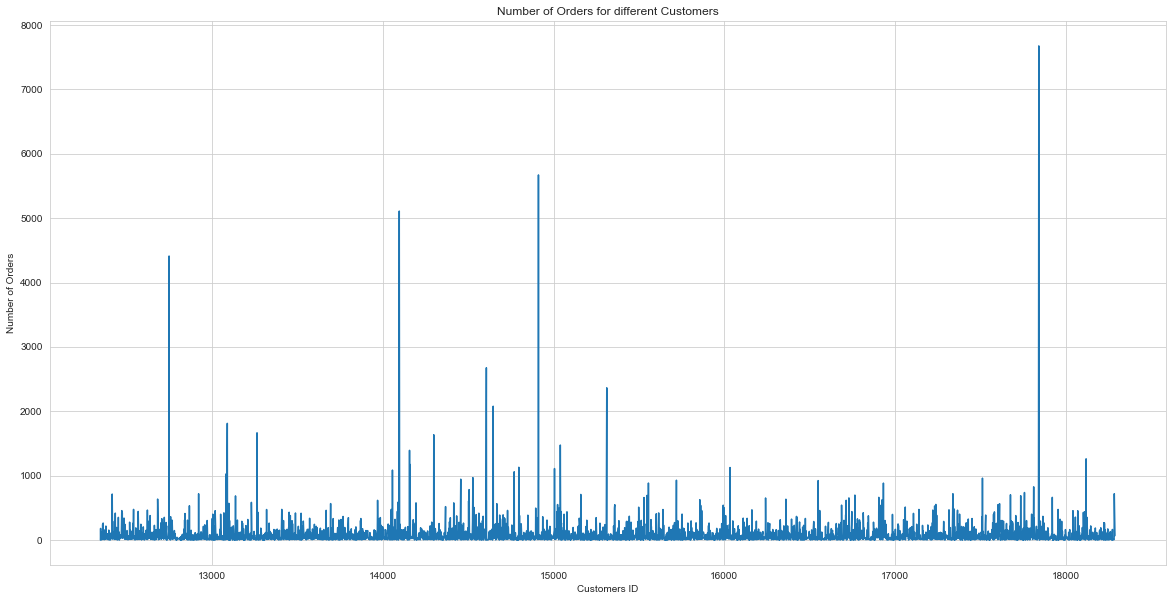

In [31]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(20,10))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

## 7. Top 5 customers with higher number of orders

In [120]:
print('The Top 5 customers with most number of orders')
orders.sort_values(by='invoice_num', ascending=False).head()

The Top 5 customers with most number of orders


,cust_id,country,invoice_num
4019,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413
1670,14606,United Kingdom,2677


## 8. How much money spent by the customers? 

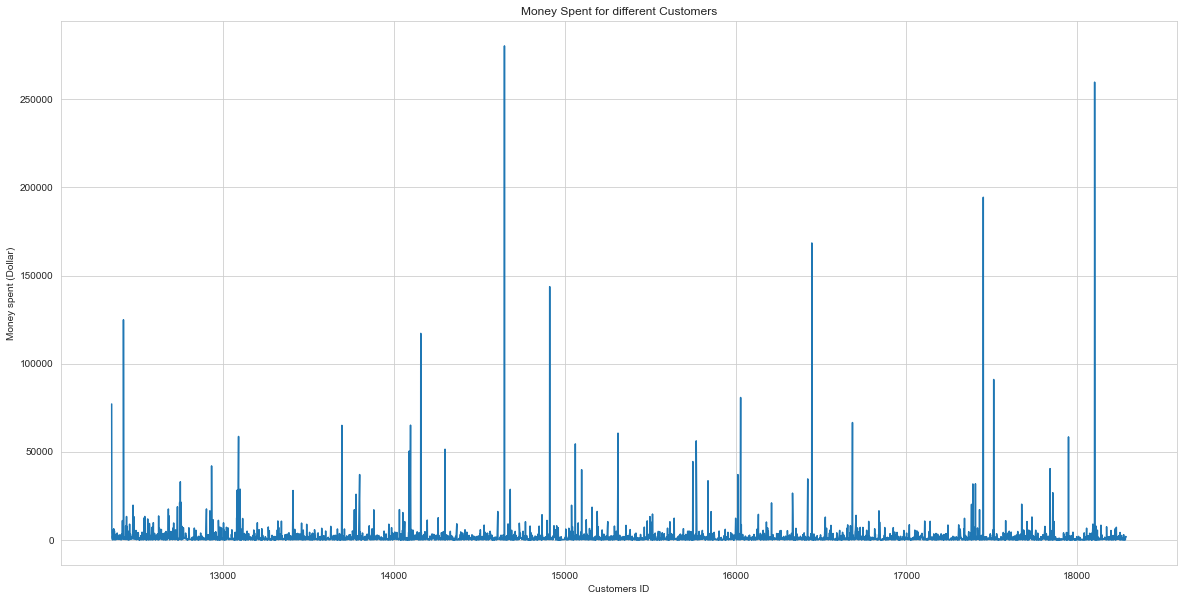

In [33]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(20,10))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

## 9. Top 5 customers with highest money spent 

In [119]:
print('The Top 5 customers with highest money spent')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The Top 5 customers with highest money spent


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194390.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143711.17


## 10. How many orders per month?

In [118]:
# color available
#sns.palplot(color)

In [36]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [117]:
df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: year_month, dtype: int64

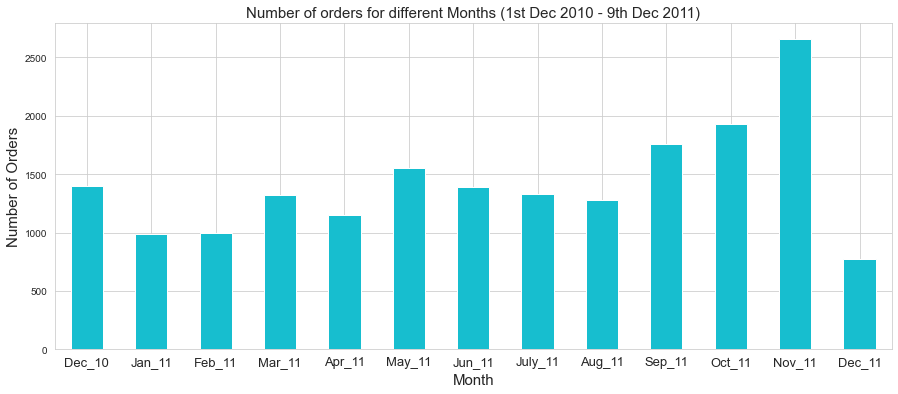

In [37]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[9],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [114]:
#November 2011 has the highest order of the month(1st Dec 2010 - 9th Dec 2011 )

## 11. How many orders per day? 

In [38]:
print(type(df_new.groupby('invoice_num')['day']))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [39]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

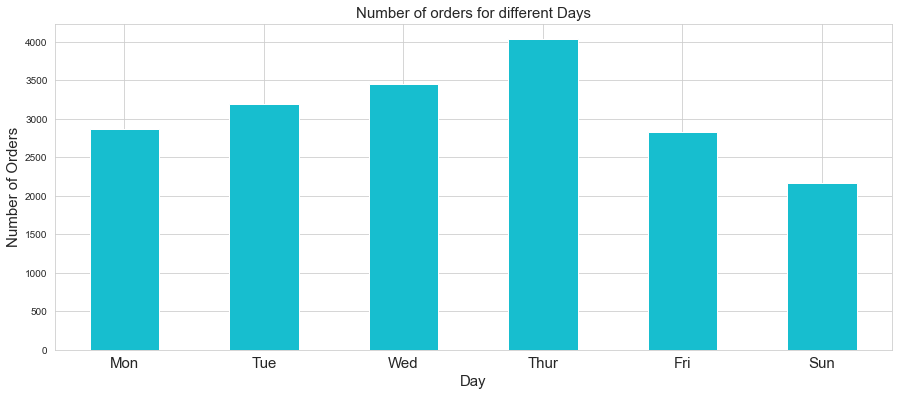

In [40]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[9],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [112]:
#Thursday has the highest order

## 12. How many orders per hour? 

In [41]:
df_new.groupby('invoice_num')['hour'].value_counts().iloc[::-1].sort_index()

invoice_num  hour
536365       8        7
536366       8        2
536367       8       12
536368       8        4
536369       8        1
                     ..
581583       12       2
581584       12       2
581585       12      21
581586       12       4
581587       12      15
Name: hour, Length: 18537, dtype: int64

In [99]:
ax=df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1]
ax

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[12]        3129
[13]        2637
[11]        2276
[14]        2275
[10]        2226
[15]        2038
[9]         1394
[16]        1100
[8]          555
[17]         544
[18]         169
[19]         144
[7]           29
[20]          18
[11, 12]       1
Name: hour, dtype: int64

In [101]:
ax=ax.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

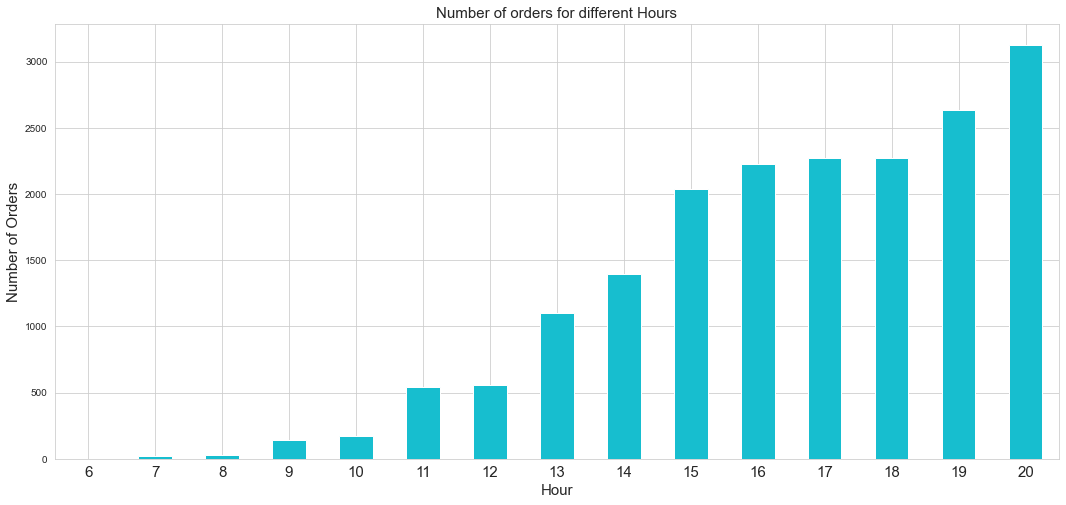

In [102]:
ax=ax.plot(kind='bar',color=color[9],figsize=(18,8))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

In [ ]:
# orders are from 6 to 20 hour duration

In [93]:
'''ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].plot(kind='bar',color=color[9],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()'''

"ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].plot(kind='bar',color=color[9],figsize=(15,6))\nax.set_xlabel('Hour',fontsize=15)\nax.set_ylabel('Number of Orders',fontsize=15)\nax.set_title('Number of orders for different Hours',fontsize=15)\nax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)\nplt.show()"

# Discover patterns for **<span class="girk">Unit Price</span>**

In [160]:
df_new.unit_price.describe()

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

We see that there are unit price = 0 (FREE items)

There are some free items given to customers from time to time.

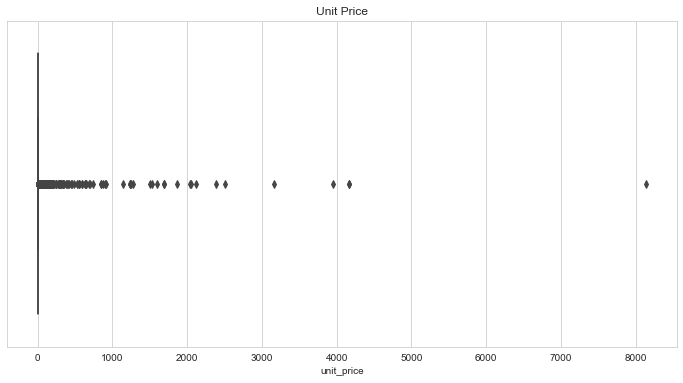

In [122]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price,color=color[9])
plt.title("Unit Price")
plt.show()

In [111]:
#unit price between 0 and 5000, a few outliers are there at 8000

In [171]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


## 13. How many orders for each country? 


In [32]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
group_country_orders

country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                241
Israel                     245
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     450
Cyprus                     603
Finland                    685
Channel Islands            747
Italy                      758
Norway                    1072
Australia                 1184
Portugal                  1453
Switzerland               1842
Belgium                   2031
Netherlands               2363


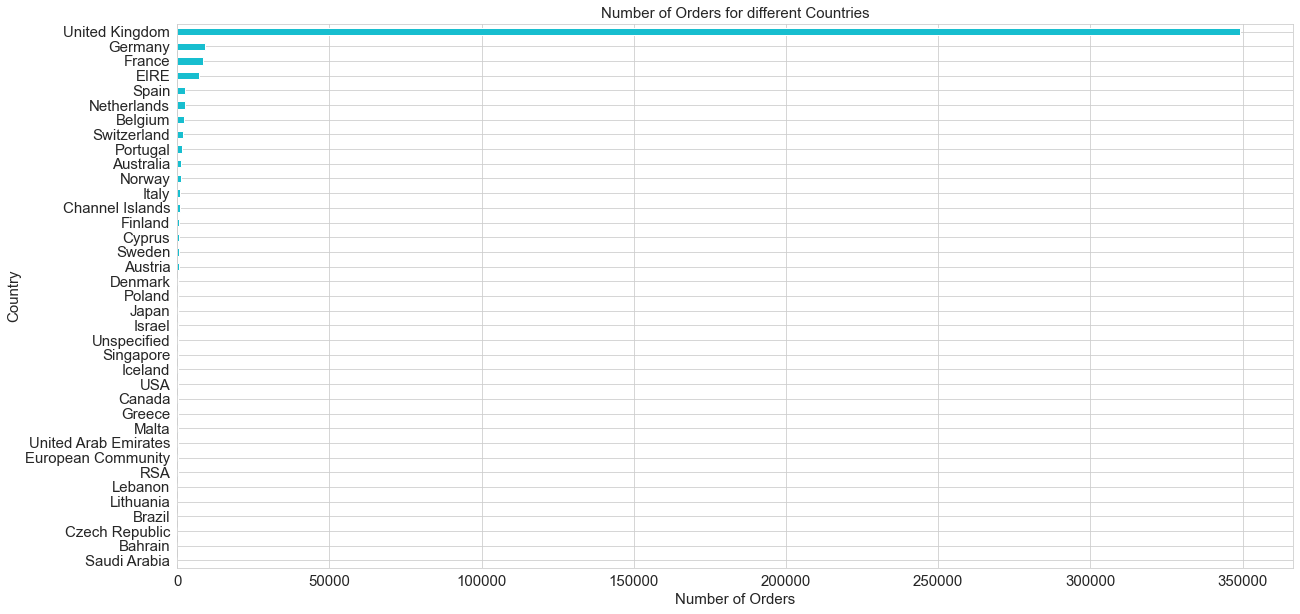

In [33]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(20,10))
group_country_orders.plot(kind='barh', fontsize=15, color=color[9])
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Number of Orders for different Countries', fontsize=15)
plt.show()

In [128]:
#United Kingdom with 349227 orders has the highest oderes followed by Germany with  9027 and France with 8327

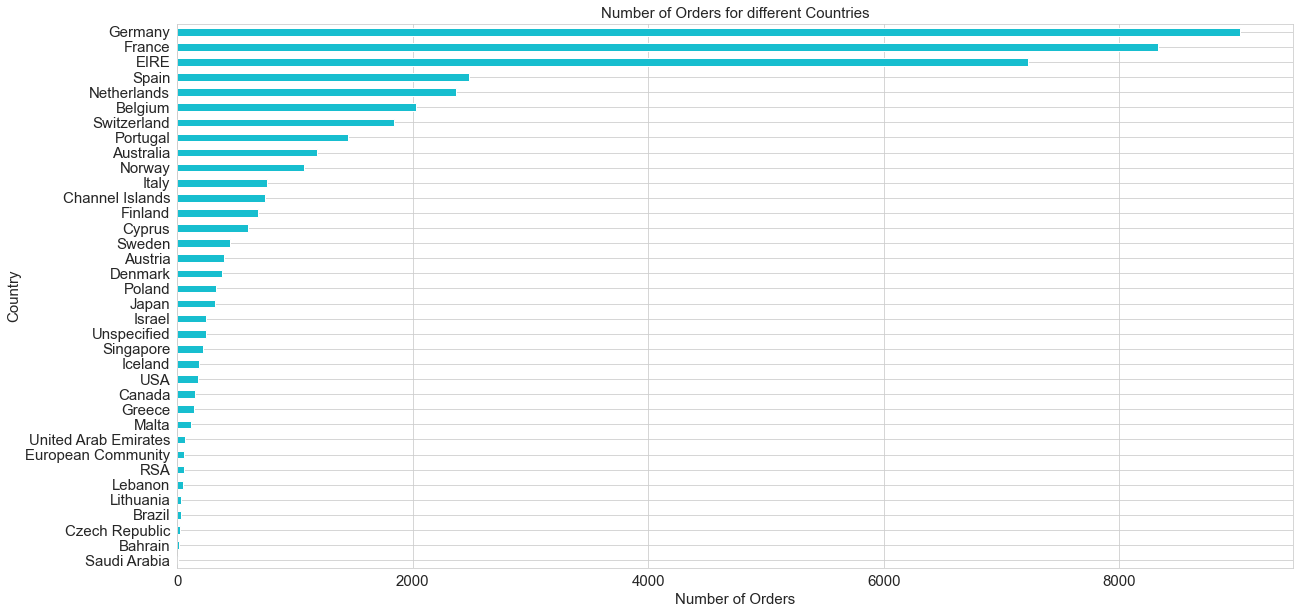

In [183]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(20,10))
group_country_orders.plot(kind='barh', fontsize=15, color=color[9])
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Number of Orders for different Countries', fontsize=15)
plt.show()

# 14. Orders trend across months

In [34]:
df_free = df_new[df_new.unit_price == 0]

In [35]:
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


In [36]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

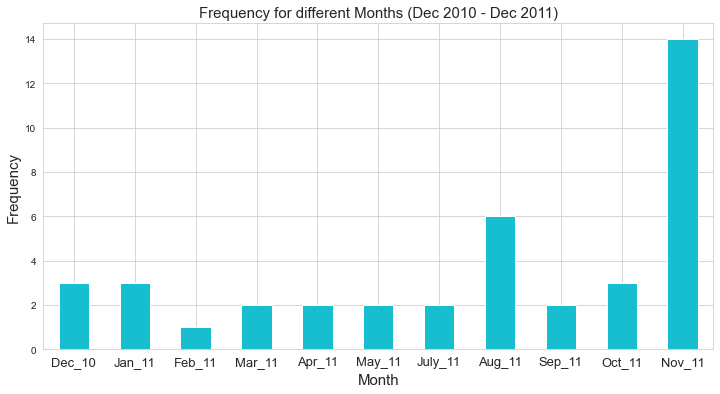

In [37]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[9])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

In [109]:
# in the of November 2011 has the highest order trend followed ny August 2011 

## 15. How much money spent by each country? 

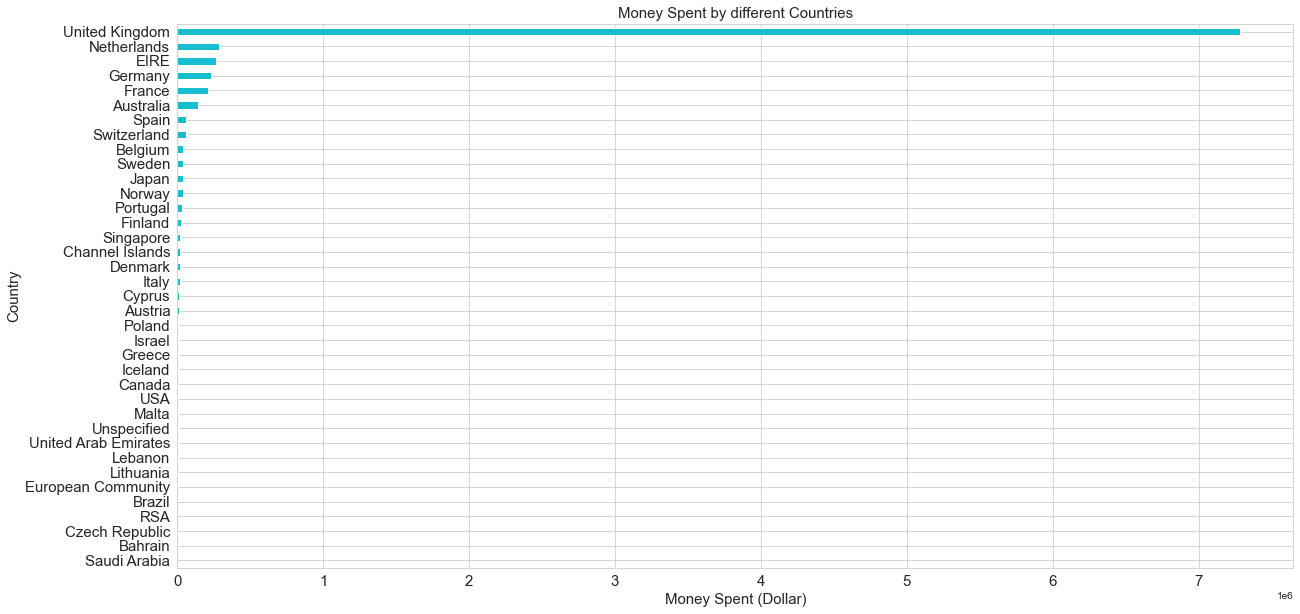

In [38]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(20,10))
group_country_amount_spent.plot(kind='barh', fontsize=15, color=color[9])
plt.xlabel('Money Spent (Dollar)', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Money Spent by different Countries', fontsize=15)
plt.show()

In [105]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
group_country_amount_spent

country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.660770e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.215840e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.350285e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.044054e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.337584e+04
Norway                  3.616544e+04
Japan                   3.7416

In [110]:
#Without any surprises United Kingdom is having the highest money spend

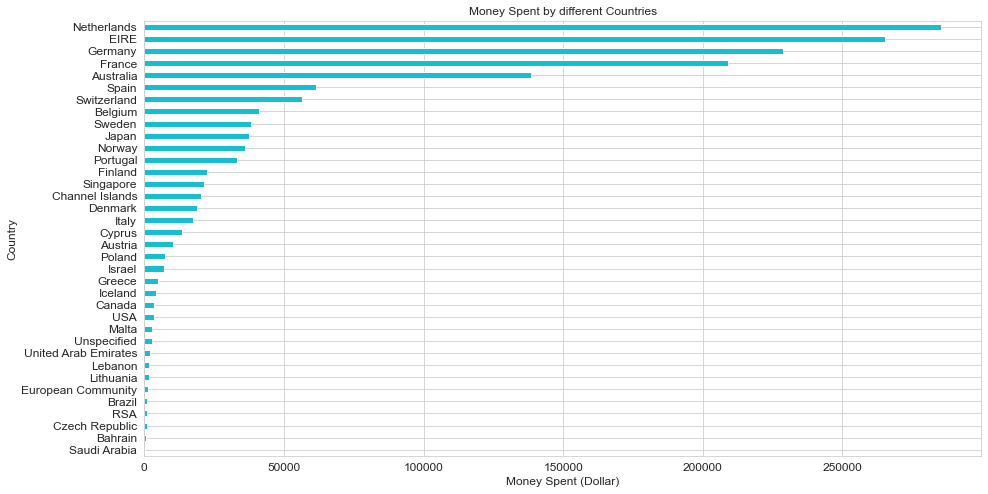

In [107]:
#
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[9])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [186]:
df_new.shape

(392732, 13)

# Graphical Representation

## Boxplot - Range of unit price

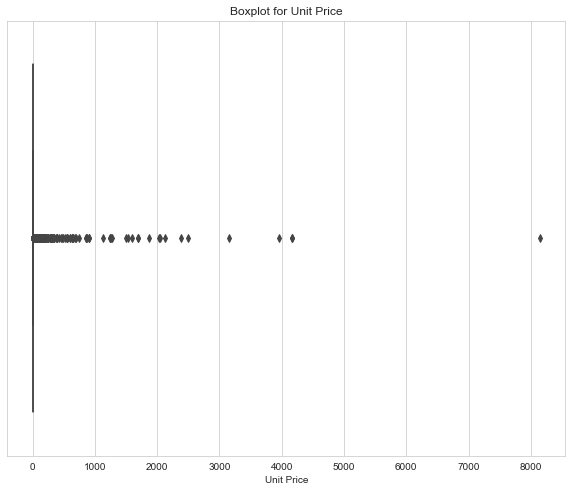

In [127]:
plt.subplots(figsize=(10,8))
sns.boxplot(df_new.unit_price)

plt.xlabel('Unit Price')
plt.title('Boxplot for Unit Price')
plt.show()

## Distribution plot - Unit price

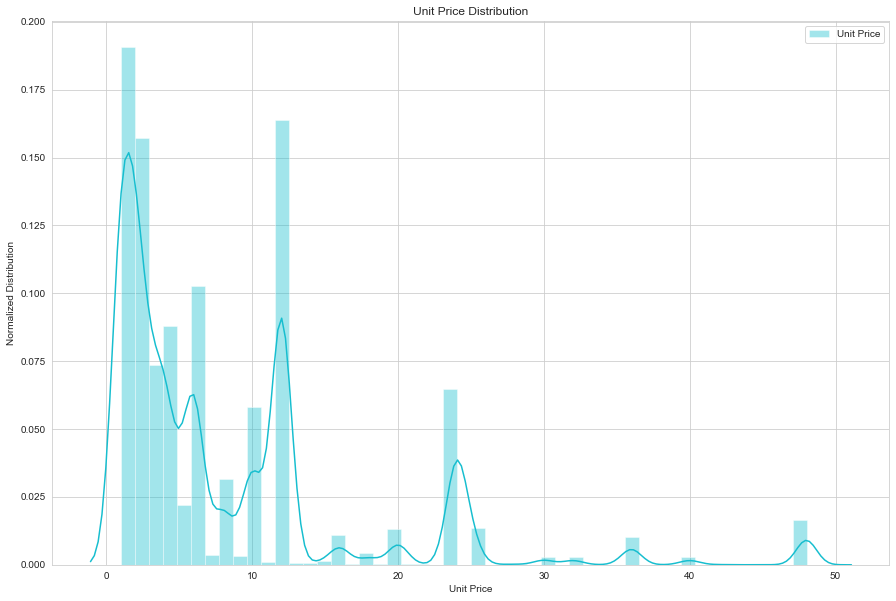

In [39]:
# Unit price distribition plot qunatity less than 50
plt.subplots(figsize=(15,10))
sns.distplot(df_new.quantity[df.quantity < 50], label='Unit Price',color=color[9]).legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()

## Bar chart - Number of orders for each country

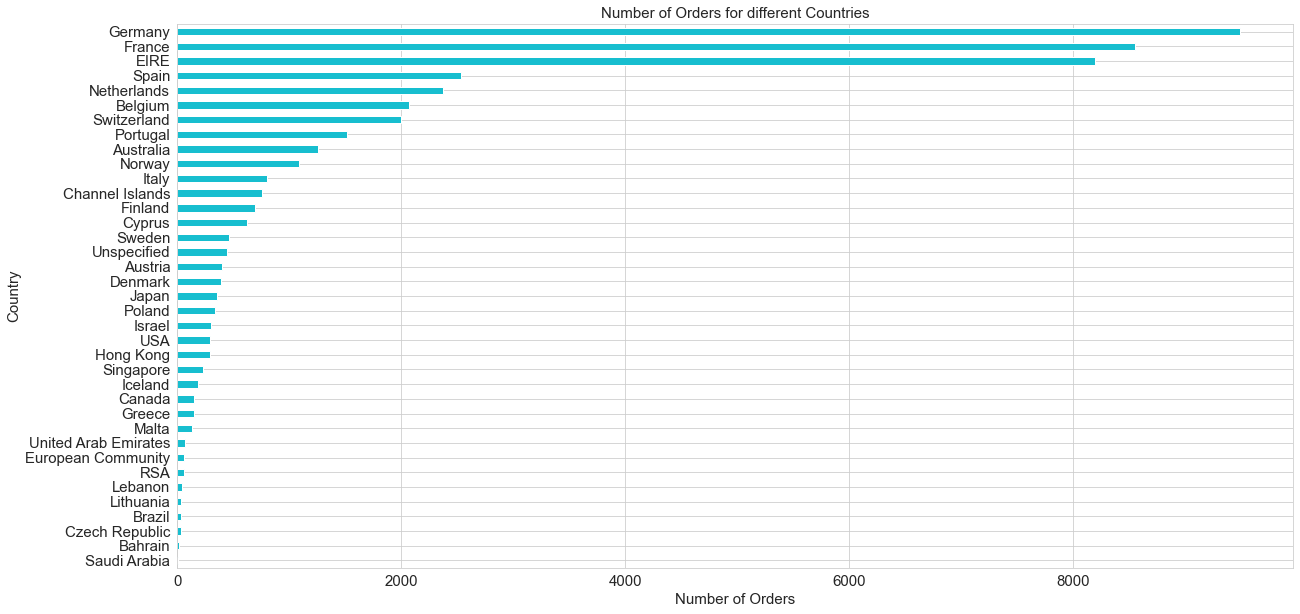

In [188]:
group_country_orders = df.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom'] # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(20,10))
group_country_orders.plot(kind='barh', fontsize=15, color=color[9])
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Number of Orders for different Countries', fontsize=15)
plt.show()

# Number of orders per day

In [189]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

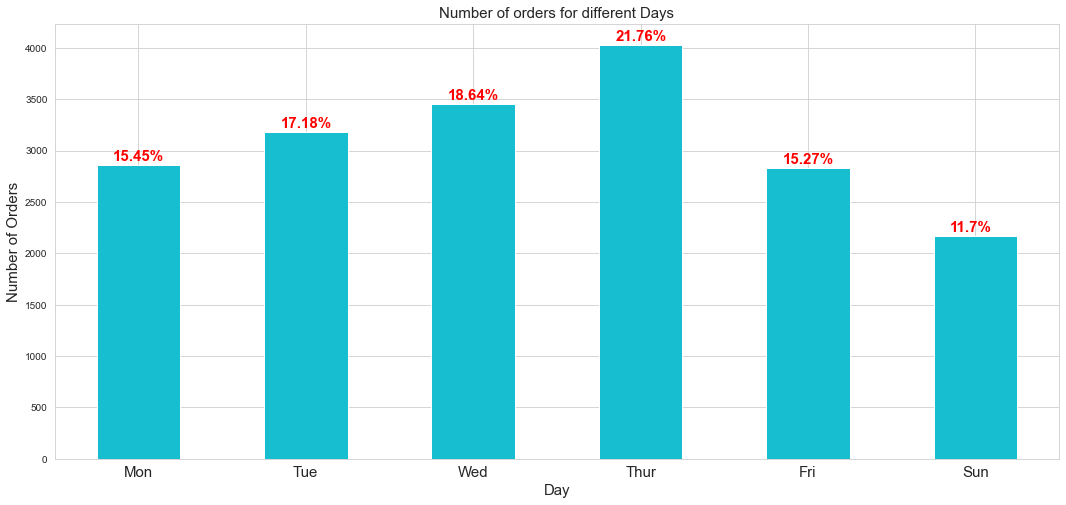

In [200]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[9],figsize=(18,8))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)

#-------------------------------------------------
# Annotate bar chart with percentage

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+40, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                fontweight='bold', color='red')
plt.show()

# Bar chart & line plot 

In [199]:
df_new.groupby(by=['year_month'])['amount_spent'].sum().index.tolist()[1:]

[201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

In [195]:
df_new.groupby(by=['year_month'])['amount_spent'].sum()[1:]

year_month
201101     568101.310
201102     446084.920
201103     594081.760
201104     468374.331
201105     677355.150
201106     660046.050
201107     598962.901
201108     644051.040
201109     950690.202
201110    1035642.450
201111    1156205.610
201112     517190.440
Name: amount_spent, dtype: float64

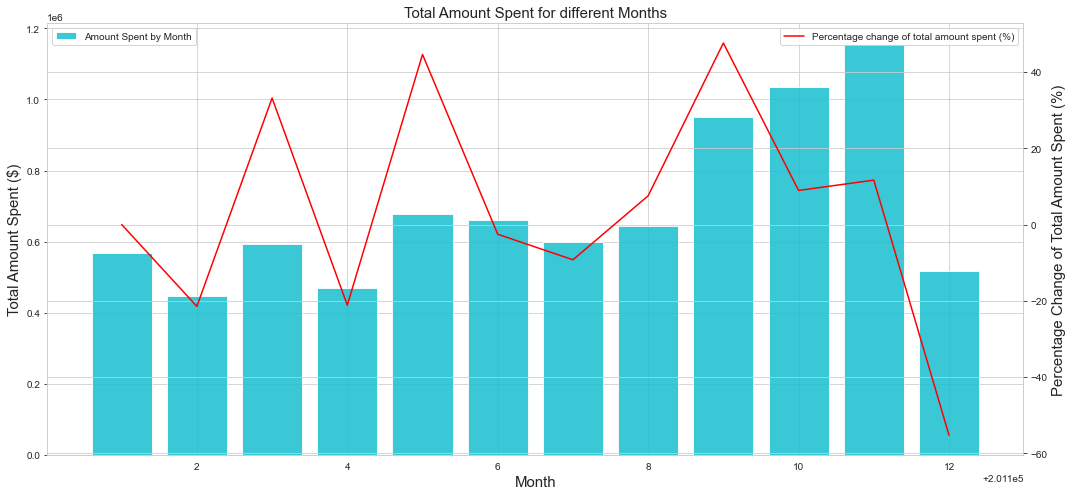

In [204]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Total Amount Spent ($)',fontsize=15)
ax1.set_title('Total Amount Spent for different Months',fontsize=15)
ax1.bar(df_new.groupby(by=['year_month'])['amount_spent'].sum().index.tolist()[1:],
        df_new.groupby(by=['year_month'])['amount_spent'].sum()[1:],
        alpha=0.85,
        label='Amount Spent by Month',color=color[9])
#----------------
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)
ax2.plot(df_new.groupby(by=['year_month'])['amount_spent'].sum().index.tolist()[1:], 
         df_new.groupby(by=['year_month'])['amount_spent'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [205]:
df_new.to_excel (r'C:/Users/salma/OneDrive/Documents/Desktop/Python Assigenment_1/Python Assignment_2/export1_dataframe.xlsx', index = False, header=True)
#export the data set into ecxcel 

# Findings 

1. Customer from UK (United Kingdon) is having the highest number of orders


2. Customer from Netherlands is having the highest amount of money spend on purachase of orders.


3. The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as below: 
    ##### United Kingdom 
	##### Germany 
	##### France
	##### Ireland (EIRE)
	##### Spain
    
    
4. As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as below: 
    ##### United Kingdom 
	##### Netherlands
	##### Ireland (EIRE)
	##### Germany
	##### France
    
    
5. Highest sale on November 2011

	 
6. There are no transactions on Saturday between 1st Dec 2010 - 9th Dec 2011.


7. The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward.


8. The company receives the highest number of orders at 12:00pm. 


9. The company tends to give out FREE items for purchases occasionally each month.

	